In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [6]:
y_train[0]

5

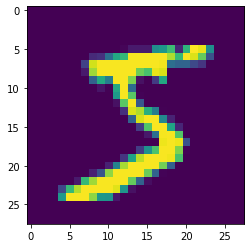

In [7]:
plt.imshow(x_train[0])

In [8]:
y_categorized_test = to_categorical(y_test,num_classes=10)

In [9]:
y_categorized_train = to_categorical(y_train,10)  #10 for chech about classes

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_test[0].max()

1.0

In [12]:
x_train[0].min()

0.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(60000,28,28,1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test = x_test.reshape(10000,28,28,1)

In [17]:
x_test.shape

(10000, 28, 28, 1)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters= 32,kernel_size = (4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [24]:
model.fit(x_train,y_categorized_train, epochs= 10 ,validation_data= (x_test,y_categorized_test),callbacks = [early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 700us/sample - loss: 0.1385 - accuracy: 0.9586 - val_loss: 0.0544 - val_accuracy: 0.9827
Epoch 2/10
60000/60000 [==============================] - 40s 672us/sample - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 41s 677us/sample - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0437 - val_accuracy: 0.9856


In [25]:
loss =pd.DataFrame(model.history.history)

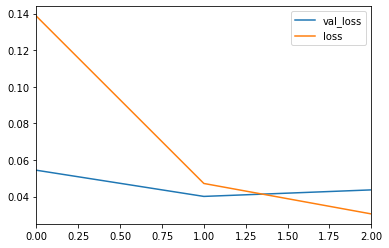

In [27]:
loss[['val_loss','loss']].plot()

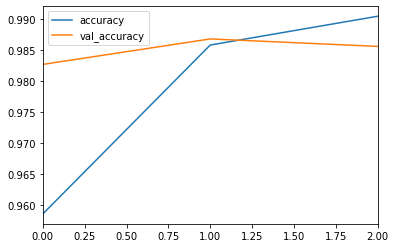

In [28]:
loss[['accuracy','val_accuracy']].plot()

In [29]:
prediction = model.predict_classes(x_test)

In [30]:
from sklearn.metrics import classification_report ,confusion_matrix

In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
print(confusion_matrix(y_test,prediction))

[[ 974    0    3    1    0    1    0    0    1    0]
 [   0 1113    9    4    0    1    0    6    2    0]
 [   0    0 1024    0    0    0    0    5    2    1]
 [   0    0    1 1000    0    3    0    1    3    2]
 [   0    0    4    0  967    0    0    1    2    8]
 [   2    0    1   11    0  875    2    0    0    1]
 [   7    2    1    1    2    4  939    0    2    0]
 [   0    0    8    2    0    0    0 1010    3    5]
 [   5    1    2    1    0    1    0    2  960    2]
 [   1    1    0    2    5    3    0    2    1  994]]


In [33]:
my_number  = x_test[0]

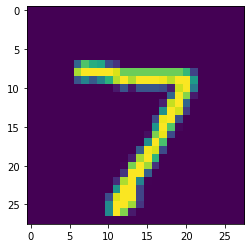

In [34]:
plt.imshow(my_number.reshape(28,28))

In [35]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)